1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [2]:
from IPython.display import Image
#Image('two_categories_scatter_plot.png')

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

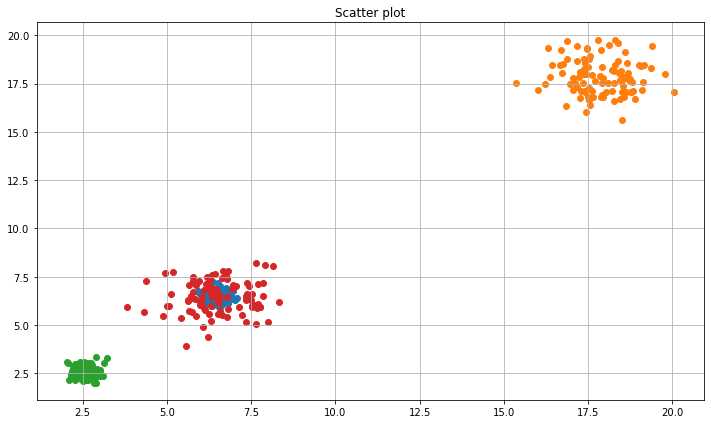

In [173]:
def generate(n):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Scatter plot')
    fig.tight_layout()
    plt.grid()
    for i in range(n):
        mu=np.random.uniform(0.,20.)
        sigma=np.random.uniform(0.,1.)
        X = np.random.normal(mu, sigma, 100) 
        Y = np.random.normal(mu, sigma, 100)
        plt.scatter(X,Y)
generate(4)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

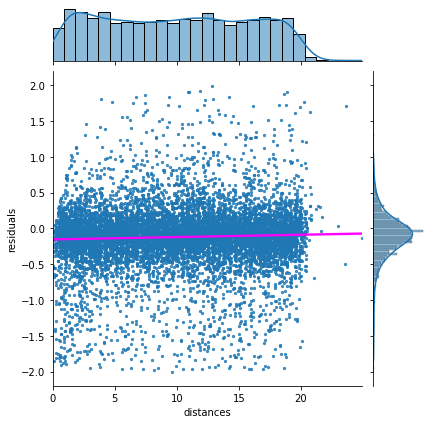

In [196]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data_06/
file_name= "data_06/residuals_261.pkl"

diz=dict(pd.read_pickle(file_name).item())
data=pd.DataFrame(diz)
data = data.loc[(data["residuals"] > -2) & (data["residuals"] < 2)]
sns.jointplot(x="distances", y="residuals", data=data, kind = "reg", scatter_kws={"s": 5}, line_kws={"color": "magenta"})

x:
 [ 0.415  1.245  2.075  2.905  3.735  4.565  5.395  6.225  7.055  7.885
  8.715  9.545 10.375 11.205 12.035 12.865 13.695 14.525 15.355 16.185
 17.015 17.845 18.675 19.505 20.335 21.165 21.995 22.825 23.655 24.485]
y:
 [-0.22746125 -0.16864277 -0.16334425 -0.16718146 -0.13378049 -0.13917
 -0.13657911 -0.11918505 -0.0899215  -0.07545645 -0.10437874 -0.09111305
 -0.04557276 -0.08549622 -0.07124827 -0.12653403 -0.11783042 -0.14677773
 -0.12984828 -0.12642509 -0.17404372 -0.13714615 -0.11771333 -0.05974595
  0.05151488  0.1375      0.06333333  0.02857143  0.605              nan
  0.        ]
err_y:
 [0.46693549 0.4630088  0.40344238 0.41530126 0.43625561 0.37286803
 0.39548202 0.46306388 0.46731845 0.40465166 0.41315206 0.42566214
 0.42940939 0.46726397 0.49215896 0.48910147 0.45354926 0.47299582
 0.46500289 0.45637862 0.41004957 0.41113979 0.4192925  0.3573757
 0.49757445 0.33457996 0.09666667 0.         1.105             nan
 0.        ]


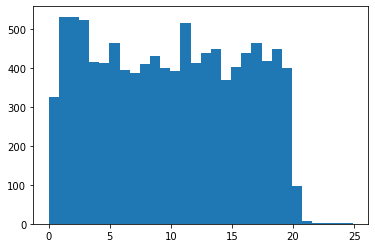

In [197]:
a,bins,_=plt.hist(data.distances,bins=30)
x=np.array([0.5*(bins[i]+bins[i+1]) for i in range(0,len(bins)-1)])
y=np.zeros(len(bins))
err_y=np.zeros(len(bins))
for i in range(0,len(bins)-1):
    c=data.loc[(data["distances"] >bins[i]) & (data["distances"] <bins[i+1])].residuals
    y[i]=np.mean(c)
    err_y[i]=np.std(c)
print("x:\n",x)
print("y:\n",y)
print("err_y:\n",err_y)

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Integral of the sum of all gaussians: 4000.0000000000146
Integral of the histogram: 400.0
The factor is 0.09999999999999963
REcomputing the integral with new gaussian: 399.99999999999994 and it is equal to the histogram one


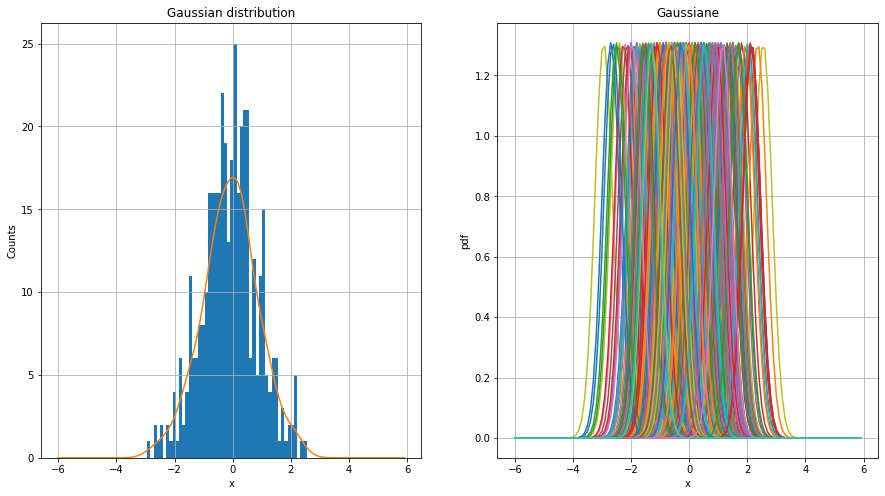

In [333]:
fig, axs = plt.subplots(1, 2,figsize=(15, 8))
N=400

## FIRST PART
x= np.random.normal(0, 1, N)
val,_,_=axs[0].hist(x, bins=50)
axs[0].set_title('Gaussian distribution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Counts')
axs[0].grid()


##SECOND PART

axs[1].set_title('Gaussiane')
axs[1].set_xlabel('x')
axs[1].set_ylabel('pdf')
axs[1].grid()
x_axis = np.arange(-6, 6, 0.1)
tot=0
for mu in x:
    sigma=1.06*np.std(x)*x.size**(-1/5)
    norm=stats.norm.pdf(x_axis, mu, sigma)
    axs[1].plot(x_axis,norm)
    tot+=norm


integral=scipy.integrate.trapz(tot)
print("Integral of the sum of all gaussians:",integral)
intX=np.sum(val)
print("Integral of the histogram:",intX)
fact=intX/integral
print("The factor is",fact)
                    
T=tot[:]*fact
intT=scipy.integrate.trapz(T)
print("REcomputing the integral with new gaussian:",intT,"and it is equal to the histogram one")

axs[0].plot(x_axis,T)